#CNN

##Import dan mounting data

In [ ]:
!pip install tensorflow keras --upgrade



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 43.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [ ]:
import tensorflow as tf

from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.losses import *

# Verifikasi versi
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)



TensorFlow version: 2.16.1
Keras version: 3.3.3


In [ ]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Matplot Images
import matplotlib.image as mpimg

# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras import regularizers
from tensorflow.keras.losses import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model, to_categorical

#Kernel Intilizer
from tensorflow.keras.initializers import he_normal

# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax

#PreTrained Model
from tensorflow.keras.applications import *

#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Warnings Remove
import warnings
warnings.filterwarnings("ignore")

# F1 Score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Splitting Data
# import splitfolders
from keras.regularizers import l2

In [ ]:
!git clone https://github.com/antonwijayacakra/Datasheet-fundus-STQ-with-AI-.git

Cloning into 'Datasheet-fundus-STQ-with-AI-'...
remote: Enumerating objects: 3903, done.
remote: Counting objects: 100% (667/667), done.
remote: Compressing objects: 100% (657/657), done.
remote: Total 3903 (delta 12), reused 665 (delta 10), pack-reused 3236
Receiving objects: 100% (3903/3903), 230.44 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (3904/3904), done.


In [ ]:
# Directory containing the "TRAIN" folder
directory_train = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Train"

filepath =[]
label = []

folds = os.listdir(directory_train)

for fold in folds:
    f_path = os.path.join(directory_train , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_train

,filepath,label
0,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
1,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
2,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
3,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
4,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
...,...,...
3295,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
3296,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
3297,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
3298,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR


In [ ]:
# Directory containing the "VALIDATION" folder
directory_val = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Validation"

filepath =[]
label = []

folds = os.listdir(directory_val)

for fold in folds:
    f_path = os.path.join(directory_val , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_valid = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_valid

,filepath,label
0,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
1,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
2,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
3,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
4,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
...,...,...
295,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
296,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
297,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
298,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR


In [ ]:
# Directory containing the "TEST" folder
directory_test = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Test"

filepath =[]
label = []

folds = os.listdir(directory_test)

for fold in folds:
    f_path = os.path.join(directory_test , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
df_test

,filepath,label
0,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
1,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
2,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
3,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
4,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,Normal
...,...,...
295,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
296,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
297,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR
298,./Datasheet-fundus-STQ-with-AI-/Split_DATASHEE...,DR


In [ ]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Validation data is: {df_valid.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (3300, 2)
The shape of The Validation data is: (300, 2)
The shape of The Test data is: (300, 2)


In [ ]:
print(label)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',

##Menentukan dimensi gambar dan batch size

In [ ]:
# Create ImageDataGenerator instances for  Train , validation and test sets (only rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1./255,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Flow images from dataframes and apply augmentation (if any)
print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Validation Data")
validation_ds = validation_datagen.flow_from_dataframe(
    df_valid,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Test Data")
test_ds = test_datagen.flow_from_dataframe(
    df_test,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Training Data
Found 3300 validated image filenames belonging to 3 classes.
Validation Data
Found 300 validated image filenames belonging to 3 classes.
Test Data
Found 300 validated image filenames belonging to 3 classes.


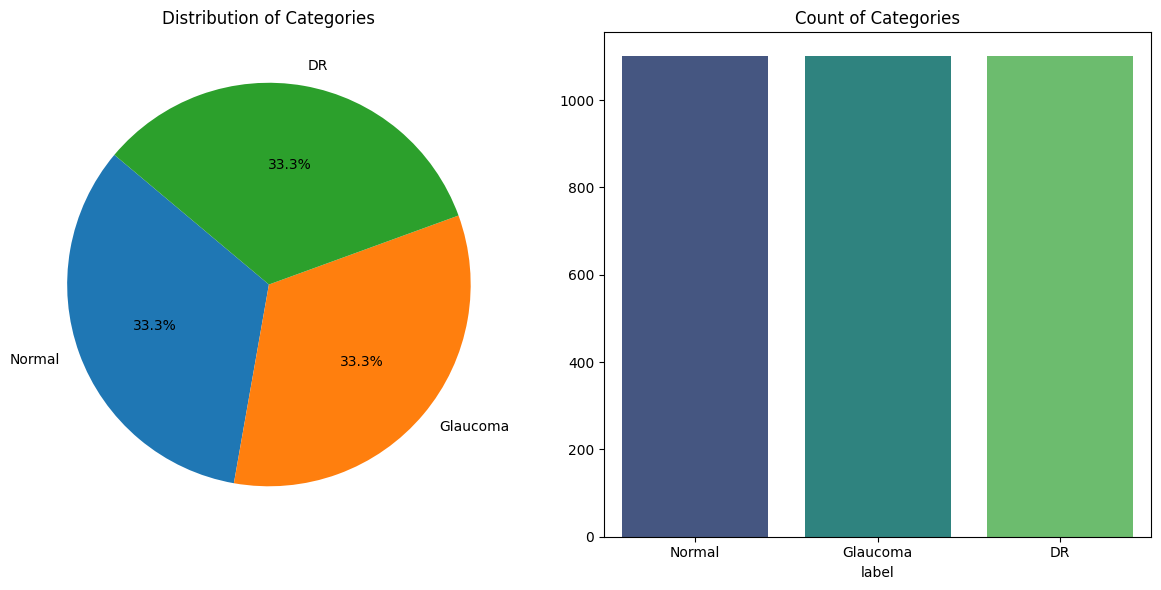

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

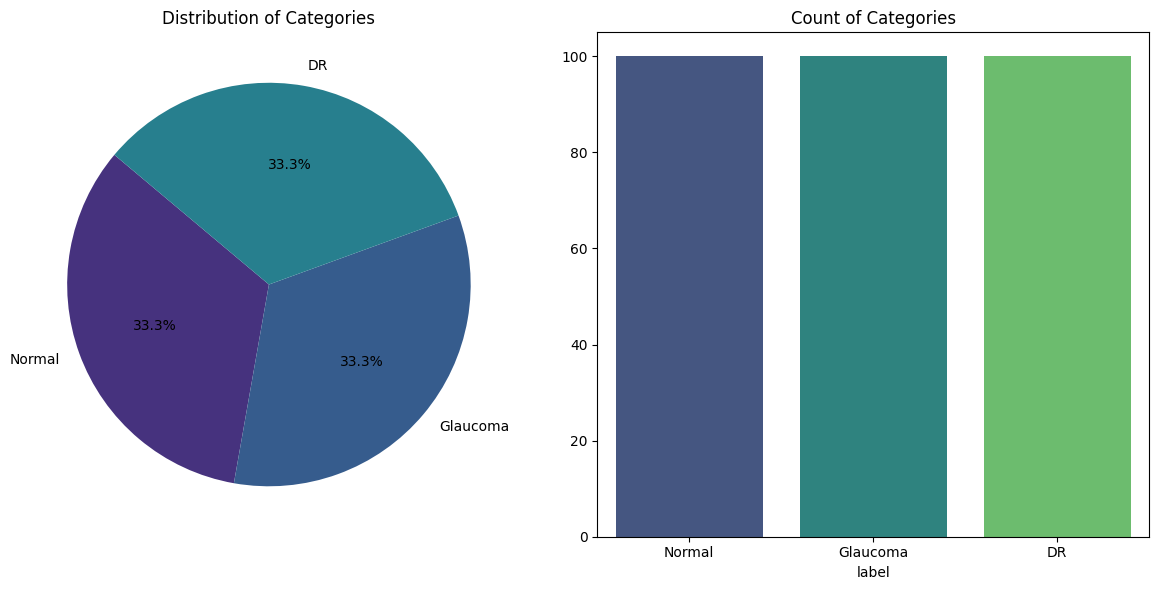

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

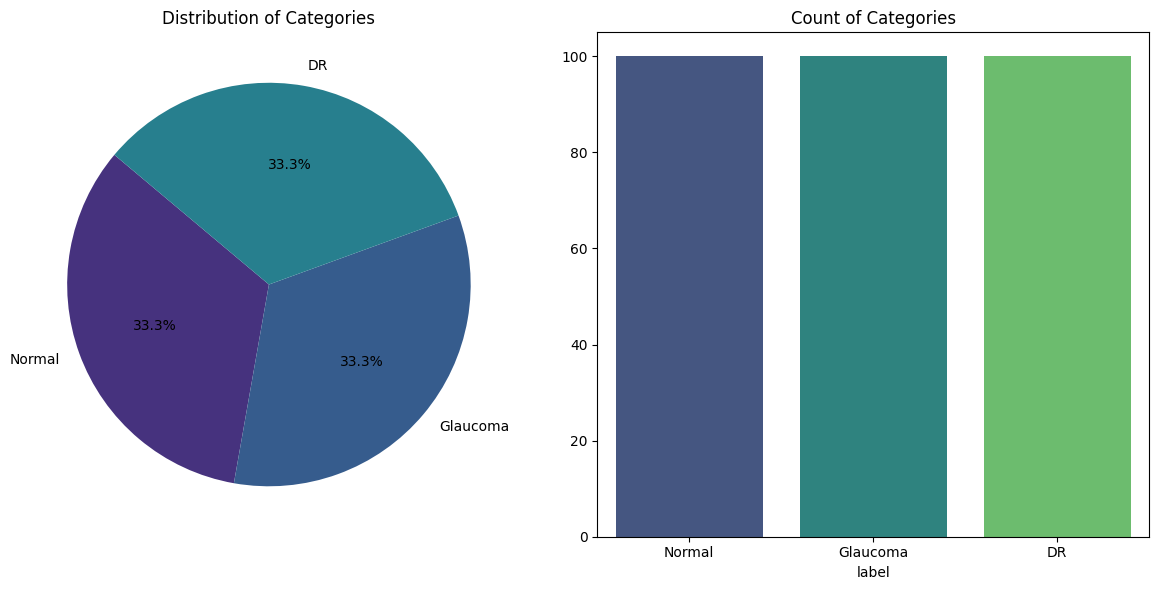

In [ ]:
# Count the occurrences of each category in the 'category' column
count = df_valid['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

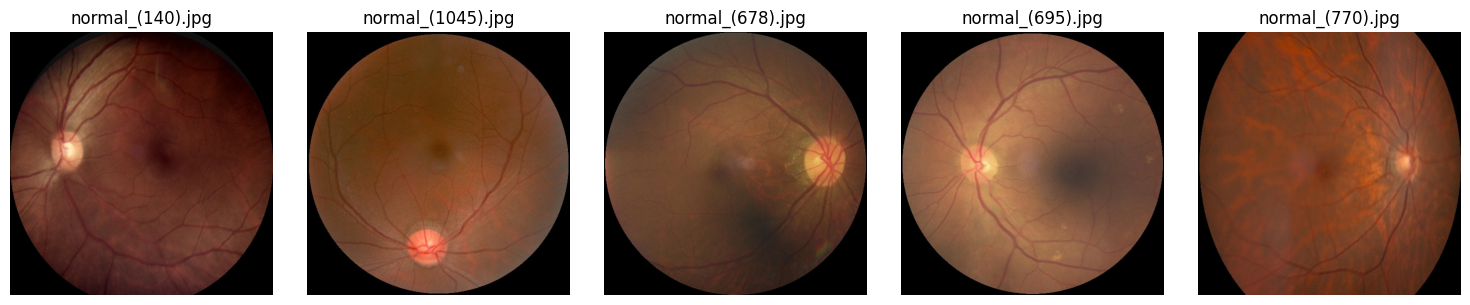

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Train/Normal"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

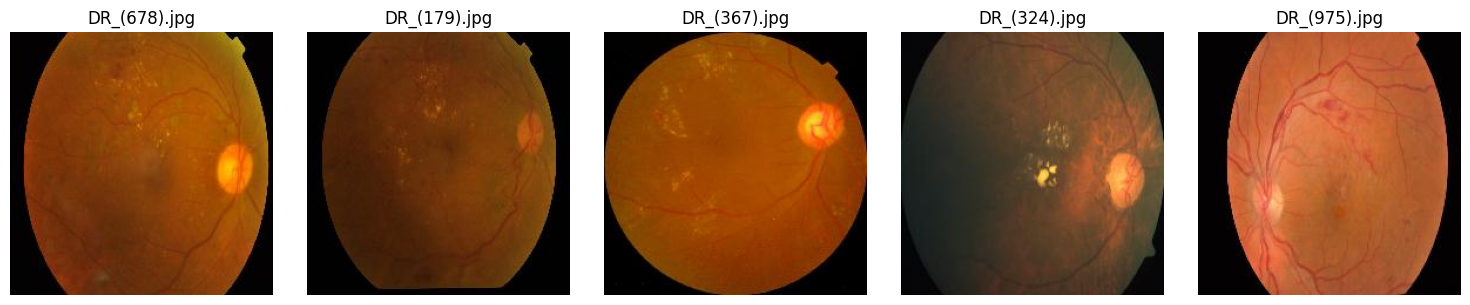

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Train/DR"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

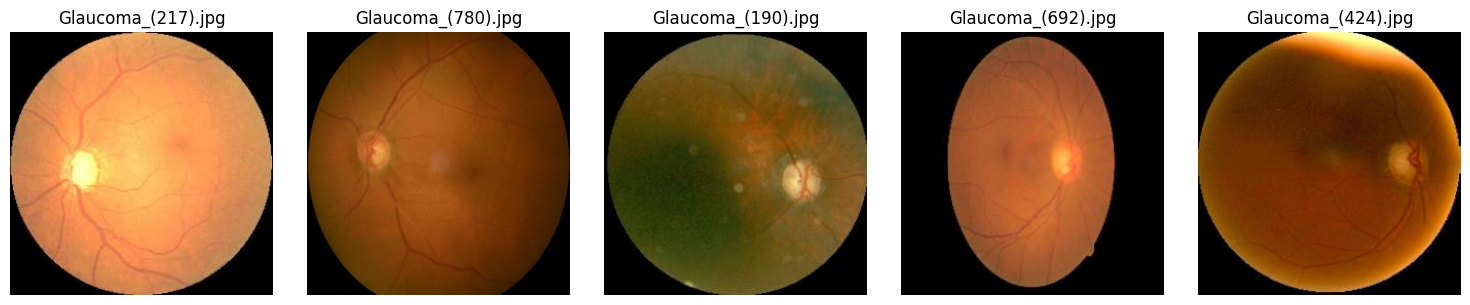

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "./Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Train/Glaucoma"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

##Modelling

Menggunakan arsitektur yang sudah disediakan di library Tensorflow.Keras.Application

## Mobile net

In [ ]:
# Load MobileNet V1 base model, excluding the top layers
base_model = MobileNet(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))
base_model.trainable = False

# Build the model
model = Sequential()
# Add the base model
model.add(base_model)
# Add Batch Normalization
model.add(BatchNormalization())
# Add Dense Layer
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add another Batch Normalization layer
model.add(BatchNormalization())
# Add Dropout layer
model.add(Dropout(0.5))
# Add the Output layer
model.add(Dense(3, activation='softmax'))
# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ ?                           │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

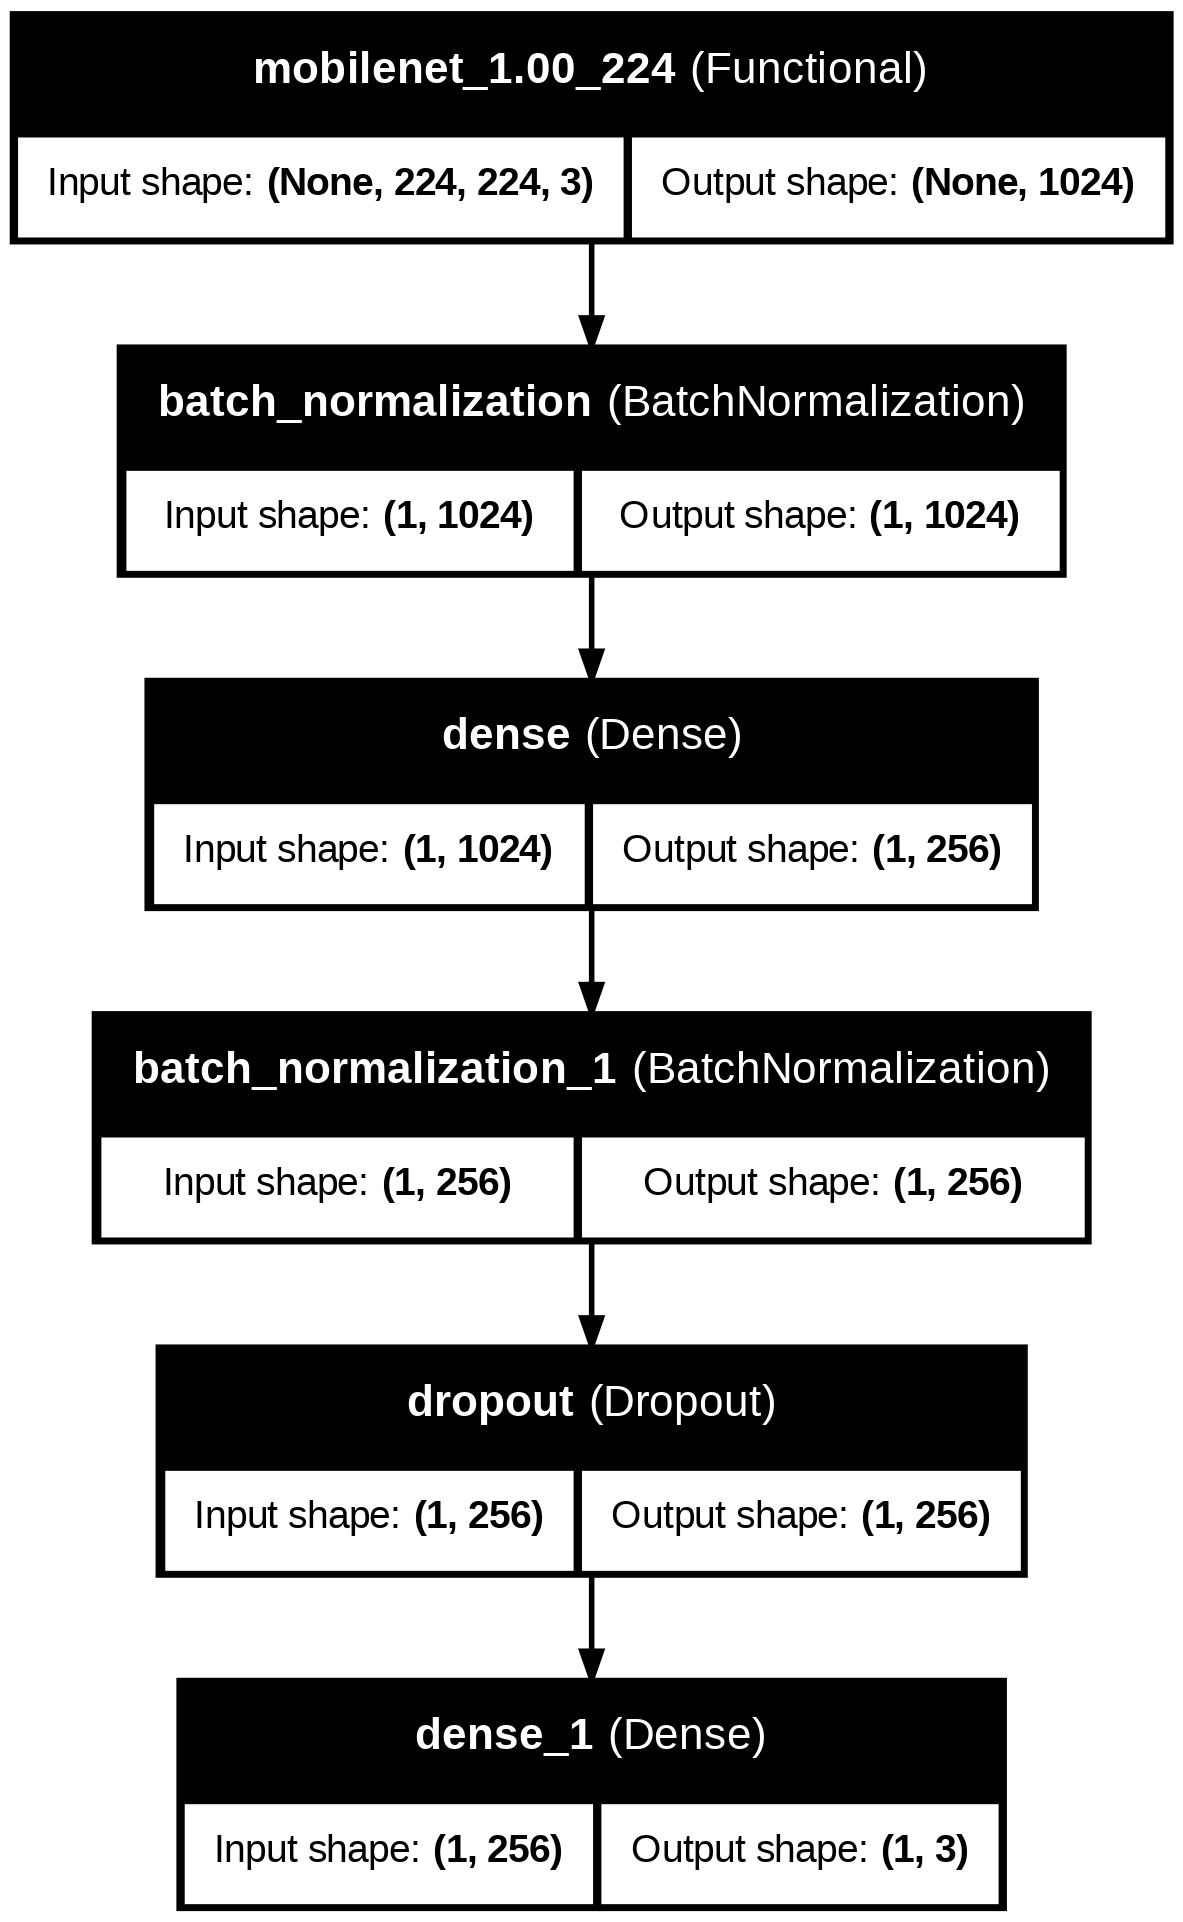

In [ ]:
 #Mengalirkan batch data dummy melalui model untuk memastikan model terbangun
model(np.zeros((1, 224, 224, 3)))

# Memetakan model dan menyimpannya ke file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Melakukan pengujian

In [ ]:
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 100,
#                         steps_per_epoch = len(train_ds),
                        validation_data = validation_ds,
#                         validation_steps = len(validation_ds),
                        callbacks = early_stopping)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 228ms/step - accuracy: 0.7539 - loss: 4.6682 - val_accuracy: 0.7633 - val_loss: 4.1700
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.8908 - loss: 3.6809 - val_accuracy: 0.8133 - val_loss: 3.6614
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.9060 - loss: 3.2639 - val_accuracy: 0.7600 - val_loss: 3.4537
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.9212 - loss: 2.8958 - val_accuracy: 0.7467 - val_loss: 3.2829
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.9382 - loss: 2.6036 - val_accuracy: 0.7600 - val_loss: 2.9926
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9466 - loss: 2.3767 - val_accuracy: 0.7667 - val_loss: 2.8027
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.9536 - loss: 2.1749 - val_accuracy: 0.7600 - val_loss: 2.6589
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.9687 -

# Menyimpan model


In [ ]:
tf.saved_model.save(model, 'mobilenetv1_saved_model')

In [ ]:
# Menyimpan Model

model.save('mobilenetV1_model_tensorflowNew.h5')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
tf.saved_model.save(model, '/content/drive/My Drive/modelidentifikasifundus_AI')

In [ ]:
model_save_name = 'mobilenetV1_model_Tensorflownew.h5'
path = F"/gdrive/MyDrive/{model_save_name}"
model.save(path)
/content/drive/My Drive/modelidentifikasifundus_AI

# Evaluasi Model


In [ ]:
# Print the first batch from validation dataset
validation_images, validation_labels = next(validation_ds)
print("Validation Batch:")
print("Images shape:", validation_images.shape)
print("Labels shape:", validation_labels.shape)

# Print the first batch from train dataset
train_images, train_labels = next(train_ds)
print("Train Batch:")
print("Images shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

# Print the first batch from test dataset
test_images, test_labels = next(test_ds)
print("Test Batch:")
print("Images shape:", test_images.shape)
print("Labels shape:", test_labels.shape)


Validation Batch:
Images shape: (32, 224, 224, 3)
Labels shape: (32, 3)
Train Batch:
Images shape: (32, 224, 224, 3)
Labels shape: (32, 3)
Test Batch:
Images shape: (32, 224, 224, 3)
Labels shape: (32, 3)


In [ ]:
print(validation_ds)
print(train_ds)
print(test_ds)

In [ ]:
# Evaluate the model on the validation dataset
training_loss, training_accuracy = model.evaluate(train_ds)

# Print the validation loss and accuracy
print("Training Loss:", training_loss)
print("Training Accuracy:", training_accuracy)


104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 1.0000 - loss: 0.2153
Training Loss: 0.21530656516551971
Training Accuracy: 1.0


In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.7599 - loss: 1.2212
Validation Loss: 1.2431303262710571
Validation Accuracy: 0.7566666603088379


In [ ]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("test Loss:", test_loss)
print("test Accuracy:", test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.6927 - loss: 1.8271
test Loss: 1.8648433685302734
test Accuracy: 0.6666666865348816


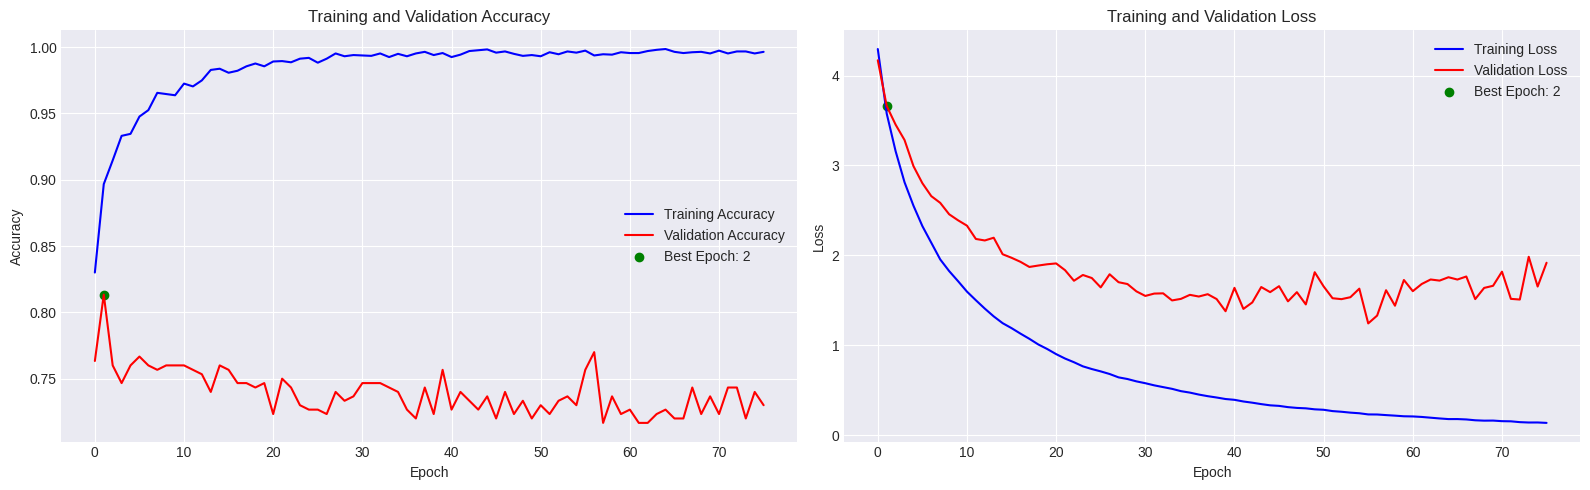

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

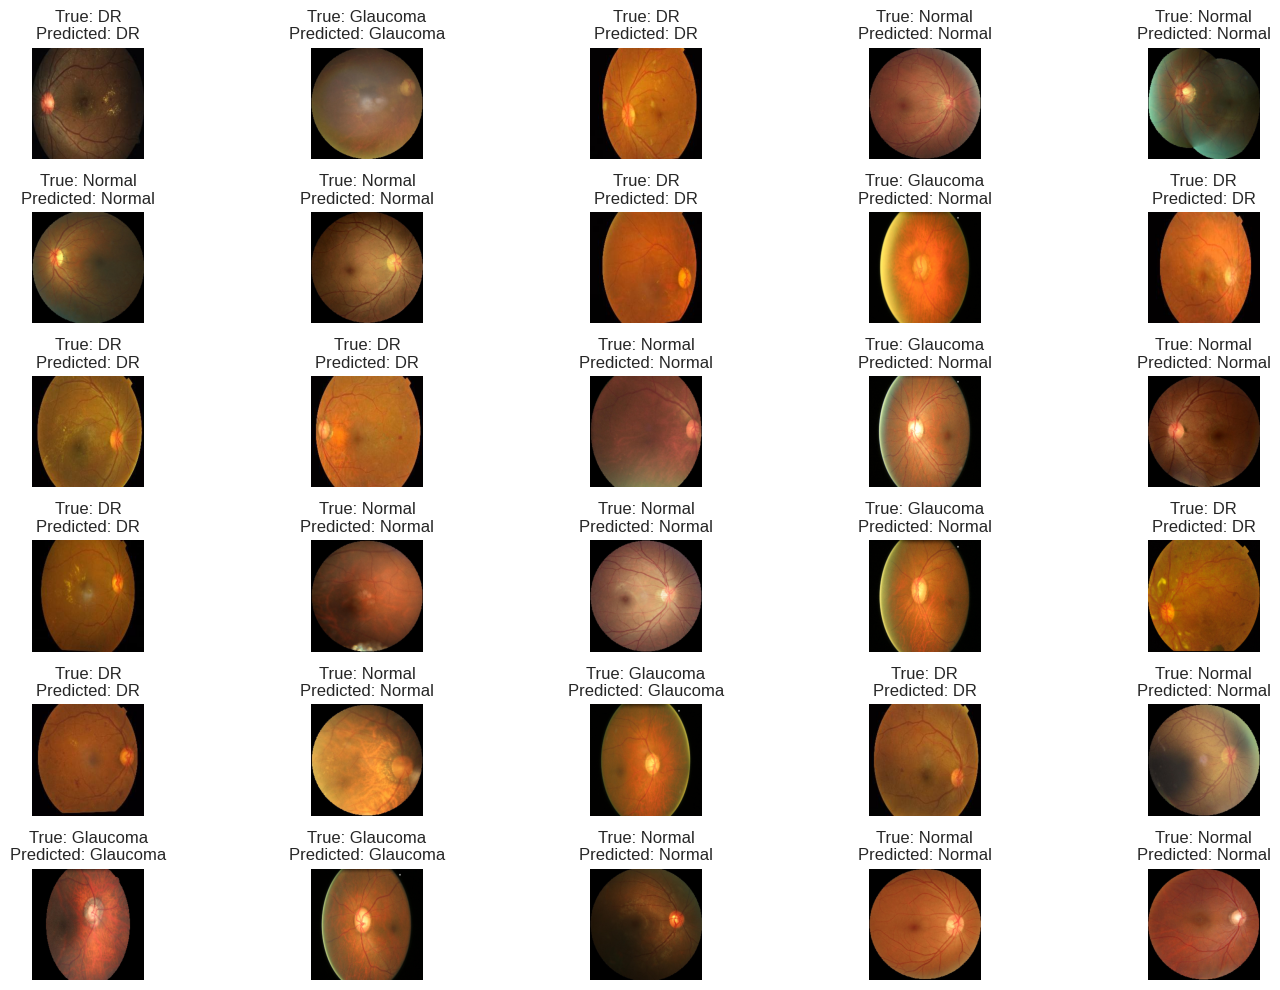

In [ ]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 30
num_images_per_row = 5  # Set the number of images per row
num_rows = 6

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)

    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]

            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
 plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


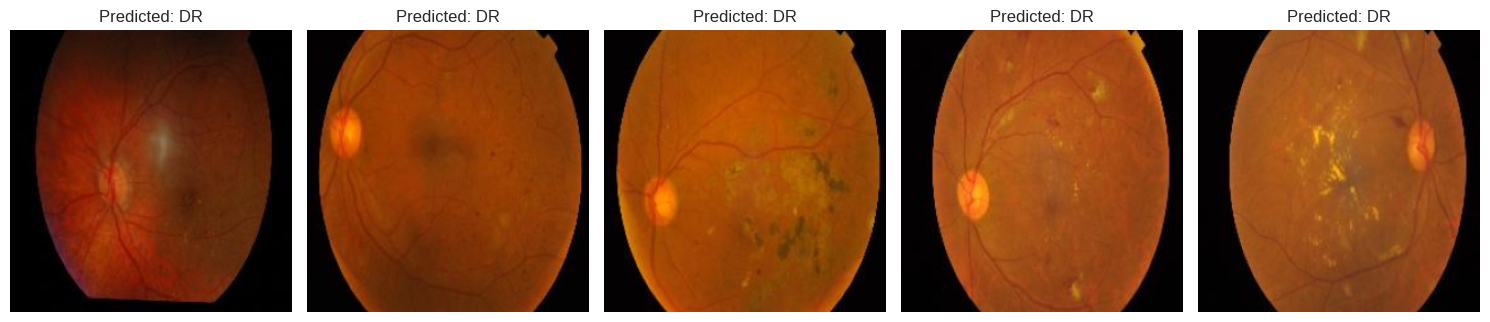

In [ ]:
# Path to the directory containing the images
directory_path = './Datasheet-fundus-STQ-with-AI-/Split_DATASHEET_N_G_DR_Kelompok3/Test/DR'

# Select N image files from the directory
image_files = os.listdir(directory_path)[:5]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (256, 256))

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'DR'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()
#